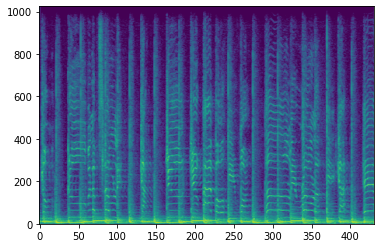

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
x, sr = librosa.load("beatles.wav")
hop_length=512
S = librosa.stft(x, hop_length=hop_length)
S = np.abs(S)
Sdb = librosa.amplitude_to_db(S,ref=np.max)
plt.imshow(Sdb, aspect='auto')
plt.gca().invert_yaxis()

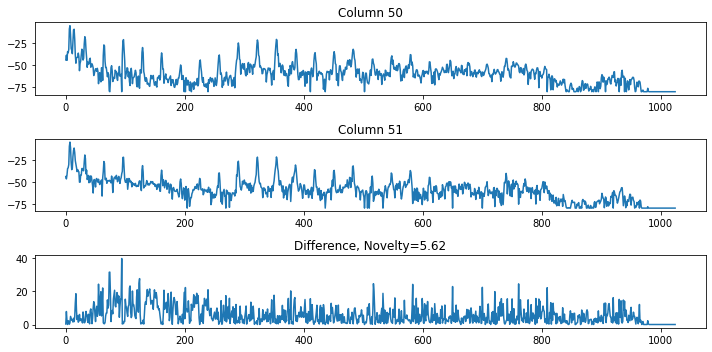

In [16]:
plt.figure(figsize=(10, 5))
start = 50
col1 = Sdb[:, start]
col2 = Sdb[:, start+1]
diff = np.abs(col2 - col1)
novelty = np.mean(diff)
plt.subplot(311)
plt.plot(col1)
plt.title("Column {}".format(start))
plt.subplot(312)
plt.plot(col2)
plt.title("Column {}".format(start+1))
plt.subplot(313)
plt.plot(diff)
plt.title("Difference, Novelty=%.3g"%novelty)
plt.tight_layout()

NameError: name 'diff' is not defined

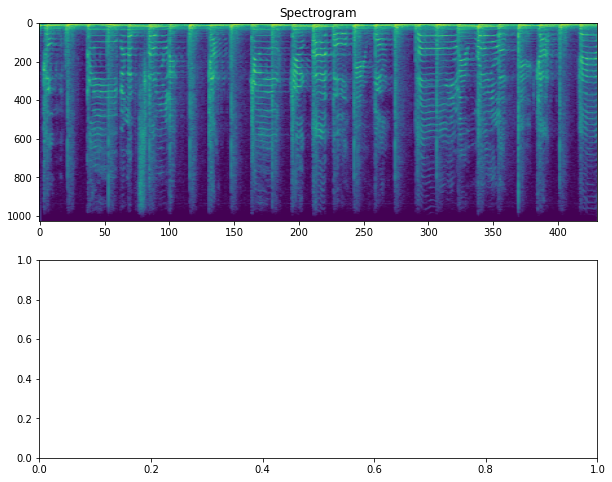

In [5]:

plt.figure(figsize=(10, 8))
plt.subplot(211)
#img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max), y_axis='linear', x_axis='time')
plt.imshow(Sdb, aspect='auto')
#plt.xlim([0, 10])
plt.title("Spectrogram")
#plt.gcf().colorbar(img, ax=plt.gca(), format="%+2.0f dB")
plt.subplot(212)
plt.plot(np.arange(len(diff))*hop_length/sr, diff)
plt.xlim([0, 10])
plt.savefig("ANF.svg", bbox_inches='tight')

/home/ctralie/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


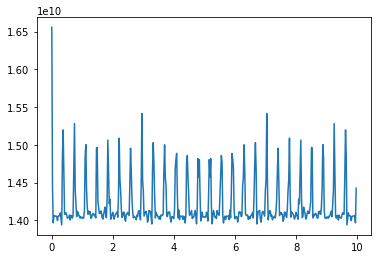

In [3]:
f = np.fft.fft(diff)
corr = np.fft.ifft(np.abs(f)**2)
plt.plot(hop_length*np.arange(corr.size)/sr, corr)